In [233]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
# from keras.models import Sequential
# from keras.optimizers import Adam
# from keras.callbacks import ModelCheckpoint
# from keras.layers import Lambda, Conv2D, MaxPooling2D, Dropout, Dense, Flatten
from skimage import io
import cv2
#from utils import INPUT_SHAPE, batch_generator
import matplotlib.pyplot as plt
import argparse
import os



In [234]:
#Datadir = 'C:/Users/vtshu/Downloads/simulator-windows-64'
#C:\Users\vtshu\Downloads\simulator-windows-64 (1)
Datadir = r'C:\Users\vtshu\Downloads\simulator-windows-64 (1)'
data_df = pd.read_csv(os.path.join(Datadir, 'driving_log.csv'), names=['center', 'left', 'right', 'steering', 'throttle', 'reverse', 'speed'])

In [235]:
data_df


,center,left,right,steering,throttle,reverse,speed
0,C:\Users\vtshu\Downloads\simulator-windows-64 ...,C:\Users\vtshu\Downloads\simulator-windows-64...,C:\Users\vtshu\Downloads\simulator-windows-64...,0.0,0.0,0,0.000078
1,C:\Users\vtshu\Downloads\simulator-windows-64 ...,C:\Users\vtshu\Downloads\simulator-windows-64...,C:\Users\vtshu\Downloads\simulator-windows-64...,0.0,0.0,0,0.000079
2,C:\Users\vtshu\Downloads\simulator-windows-64 ...,C:\Users\vtshu\Downloads\simulator-windows-64...,C:\Users\vtshu\Downloads\simulator-windows-64...,0.0,0.0,0,0.000079
3,C:\Users\vtshu\Downloads\simulator-windows-64 ...,C:\Users\vtshu\Downloads\simulator-windows-64...,C:\Users\vtshu\Downloads\simulator-windows-64...,0.0,0.0,0,0.000085
4,C:\Users\vtshu\Downloads\simulator-windows-64 ...,C:\Users\vtshu\Downloads\simulator-windows-64...,C:\Users\vtshu\Downloads\simulator-windows-64...,0.0,0.0,0,0.000078
...,...,...,...,...,...,...,...
3326,C:\Users\vtshu\Downloads\simulator-windows-64 ...,C:\Users\vtshu\Downloads\simulator-windows-64...,C:\Users\vtshu\Downloads\simulator-windows-64...,0.0,0.0,0,0.000490
3327,C:\Users\vtshu\Downloads\simulator-windows-64 ...,C:\Users\vtshu\Downloads\simulator-windows-64...,C:\Users\vtshu\Downloads\simulator-windows-64...,0.0,0.0,0,0.000496
3328,C:\Users\vtshu\Downloads\simulator-windows-64 ...,C:\Users\vtshu\Downloads\simulator-windows-64...,C:\Users\vtshu\Downloads\simulator-windows-64...,0.0,0.0,0,0.000496
3329,C:\Users\vtshu\Downloads\simulator-windows-64 ...,C:\Users\vtshu\Downloads\simulator-windows-64...,C:\Users\vtshu\Downloads\simulator-windows-64...,0.0,0.0,0,0.000496


In [236]:
data_df['steering']

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
3326    0.0
3327    0.0
3328    0.0
3329    0.0
3330    0.0
Name: steering, Length: 3331, dtype: float64

In [237]:
data_df['steering'] = np.exp(data_df['steering'])

In [238]:
data_df['steering']

0       1.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
3326    1.0
3327    1.0
3328    1.0
3329    1.0
3330    1.0
Name: steering, Length: 3331, dtype: float64

In [239]:
#data_df = data_df[0:1000]
#data_df[data_df['steering']!=0]
#data_df['steering'] = np.log(data_df['steering'])

In [240]:
data_df['steering']

0       1.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
3326    1.0
3327    1.0
3328    1.0
3329    1.0
3330    1.0
Name: steering, Length: 3331, dtype: float64

In [241]:
#data_df=data_df[data_df['steering']!=0]

In [242]:
#data_df['steering']=50

In [243]:
##data_df

C:\Users\vtshu\Downloads\simulator-windows-64 (1)\IMG\center_2022_11_17_21_31_54_724.jpg
(160, 320, 3)


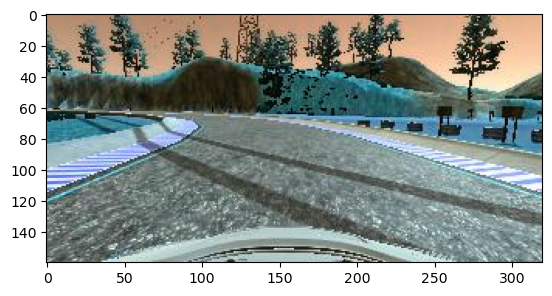

 C:\Users\vtshu\Downloads\simulator-windows-64 (1)\IMG\left_2022_11_17_21_31_54_724.jpg
(160, 320, 3)


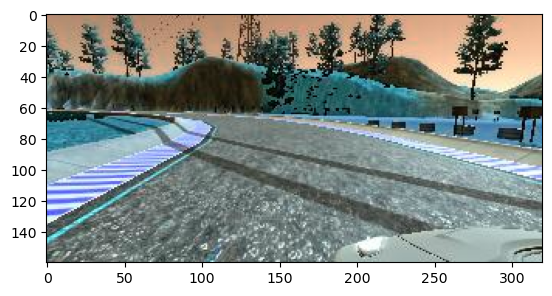

 C:\Users\vtshu\Downloads\simulator-windows-64 (1)\IMG\right_2022_11_17_21_31_54_724.jpg
(160, 320, 3)


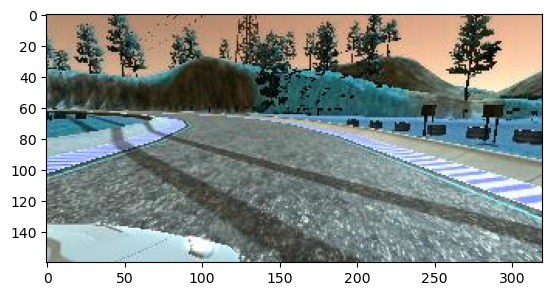

In [244]:
X = data_df[['center', 'left', 'right']].values
    #and our steering commands as our output data
y = data_df['steering'].values

    #now we can split the data into a training (80), testing(20), and validation set
    #thanks scikit learn
X_train_path, X_test_path, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


for i in range(3):    
    ex = X_train_path[0][i]
    print(ex)
    out = cv2.imread(ex.strip())
    print(out.shape)
    plt.imshow(out)
    plt.show()



In [245]:
y_train

array([0.71023761, 0.98497512, 0.80263613, ..., 1.        , 1.        ,
       1.        ])

In [246]:
y.shape

(3331,)

In [247]:
# def convert_data(Dataset):
#     numset = []
#     for i in range(Dataset.shape[0]):
#         path_list = []
#         for j in Dataset[i]:           
            
#             img = cv2.imread(j)
#             #print(f'image shape {img.shape}')
#             path_list.append(img)           
# #             break
#         numset.append(path_list)
#     return numset
# #         break
# X_train = convert_data(X_train_path)
# X_test = convert_data(X_test_path)

# # print(np.shape(np.array(training_data)))
# # print(len(y))
# print(np.shape(np.array(X_train[0][0])))        
# print(np.shape(np.array(X_train))) 
# print(np.shape(np.array(X_test))) 
# print(np.shape(np.array(y_train))) 
# print(np.shape(np.array(y_test))) 
# X_train = np.array(X_train).reshape(-1,3,160,320)
# X_test = np.array(X_test).reshape(-1,3,160)
    

In [248]:
import cv2, os
import numpy as np
import matplotlib.image as mpimg
from sqlalchemy import true

IMAGE_HEIGHT, IMAGE_WIDTH, IMAGE_CHANNELS = 66,200, 3
INPUT_SHAPE = (IMAGE_HEIGHT, IMAGE_WIDTH, IMAGE_CHANNELS)

def load_image(data_dir, image_file):
    """
    Load RGB images from a file
    """
    return mpimg.imread(os.path.join(data_dir, image_file.strip()))


def crop(image):
    """
    Crop the image (removing the sky at the top and the car front at the bottom)
    """
    return image[60:-25, :, :] # remove the sky and the car front


def resize(image):
    """
    Resize the image to the input shape used by the network model
    """
    return cv2.resize(image, (IMAGE_WIDTH, IMAGE_HEIGHT), cv2.INTER_AREA)


def rgb2yuv(image):
    """
    Convert the image from RGB to YUV (This is what the NVIDIA model does)
    """
    return cv2.cvtColor(image, cv2.COLOR_RGB2YUV)


def preprocess(image):
    """
    Combine all preprocess functions into one
    """
    image = crop(image)
    image = resize(image)
    image = rgb2yuv(image)
    return image


def choose_image(data_dir, center, left, right, steering_angle):
    """
    Randomly choose an image from the center, left or right, and adjust
    the steering angle.
    """
    choice = np.random.choice(3)
    if choice == 0:
        return load_image(data_dir, left), steering_angle + 0.2
    elif choice == 1:
        return load_image(data_dir, right), steering_angle - 0.2
    return load_image(data_dir, center), steering_angle


def random_flip(image, steering_angle):
    """
    Randomly flipt the image left <-> right, and adjust the steering angle.
    """
    if np.random.rand() < 0.5:
        image = cv2.flip(image, 1)
        steering_angle = -steering_angle
    return image, steering_angle


def random_translate(image, steering_angle, range_x, range_y):
    """
    Randomly shift the image virtially and horizontally (translation).
    """
    trans_x = range_x * (np.random.rand() - 0.5)
    trans_y = range_y * (np.random.rand() - 0.5)
    steering_angle += trans_x * 0.002
    trans_m = np.float32([[1, 0, trans_x], [0, 1, trans_y]])
    height, width = image.shape[:2]
    image = cv2.warpAffine(image, trans_m, (width, height))
    return image, steering_angle


def random_shadow(image):
    """
    Generates and adds random shadow
    """
    # (x1, y1) and (x2, y2) forms a line
    # xm, ym gives all the locations of the image
    x1, y1 = IMAGE_WIDTH * np.random.rand(), 0
    x2, y2 = IMAGE_WIDTH * np.random.rand(), IMAGE_HEIGHT
    xm, ym = np.mgrid[0:IMAGE_HEIGHT, 0:IMAGE_WIDTH]

    # mathematically speaking, we want to set 1 below the line and zero otherwise
    # Our coordinate is up side down.  So, the above the line: 
    # (ym-y1)/(xm-x1) > (y2-y1)/(x2-x1)
    # as x2 == x1 causes zero-division problem, we'll write it in the below form:
    # (ym-y1)*(x2-x1) - (y2-y1)*(xm-x1) > 0
    image=preprocess(image)
    mask = np.zeros_like(image[:, :, 1])
    mask[(ym - y1) * (x2 - x1) - (y2 - y1) * (xm - x1) > 0] = 1

    # choose which side should have shadow and adjust saturation
    cond = mask == np.random.randint(2)
    s_ratio = np.random.uniform(low=0.2, high=0.5)

    # adjust Saturation in HLS(Hue, Light, Saturation)
    hls = cv2.cvtColor(image, cv2.COLOR_RGB2HLS)
    hls[:, :, 1][cond] = hls[:, :, 1][cond] * s_ratio
    return cv2.cvtColor(hls, cv2.COLOR_HLS2RGB)


def random_brightness(image):
    """
    Randomly adjust brightness of the image.
    """
    # HSV (Hue, Saturation, Value) is also called HSB ('B' for Brightness).
    hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
    ratio = 1.0 + 0.4 * (np.random.rand() - 0.5)
    hsv[:,:,2] =  hsv[:,:,2] * ratio
    return cv2.cvtColor(hsv, cv2.COLOR_HSV2RGB)


def augument(data_dir, center, left, right, steering_angle, range_x=100, range_y=10):
    """
    Generate an augumented image and adjust steering angle.
    (The steering angle is associated with the center image)
    """
    image, steering_angle = choose_image(data_dir, center, left, right, steering_angle)
    image, steering_angle = random_flip(image, steering_angle)
    image, steering_angle = random_translate(image, steering_angle, range_x, range_y)
    #image = random_shadow(image)
    image = random_brightness(image)
    return image, steering_angle


def batch_generator2(data_dir, image_paths, steering_angles, batch_size, is_training):
    print('Hey')
    images = np.empty([batch_size, IMAGE_HEIGHT, IMAGE_WIDTH, IMAGE_CHANNELS])
    steers = np.empty(batch_size)
    while True:
        i = 0
        for index in np.random.permutation(image_paths.shape[0]):
            center, left, right = image_paths[index]
            steering_angle = steering_angles[index]
            # argumentation
            if is_training and np.random.rand() < 0.6:
                image, steering_angle = augument(data_dir, center, left, right, steering_angle)
            else:
                image = load_image(data_dir, center) 
            # add the image and steering angle to the batch
            images[i] = preprocess(image)
            steers[i] = steering_angle
            i += 1
            if i == batch_size:
                break
        return images, steers
    
    
    



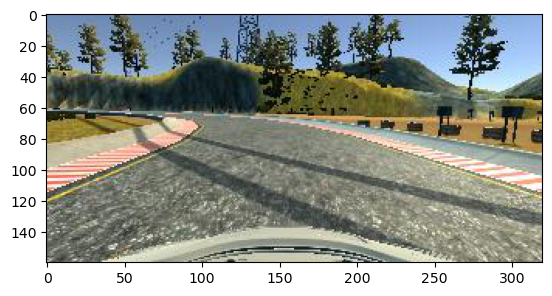

In [249]:
plt.imshow(mpimg.imread(X_train_path[0][0]))

In [250]:
X_train_path[0][0]

'C:\\Users\\vtshu\\Downloads\\simulator-windows-64 (1)\\IMG\\center_2022_11_17_21_31_54_724.jpg'

In [251]:
X_train,y_train = batch_generator2(Datadir, X_train_path, y_train,X_train_path.shape[0] , True)#

Hey


In [252]:
X_test,y_test = batch_generator2(Datadir, X_test_path, y_test, X_test_path.shape[0], False)

Hey


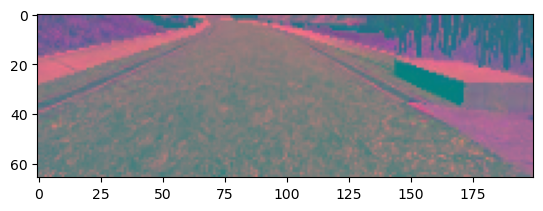

In [253]:
plt.imshow(X_train[15]/255)

In [254]:
X_train.shape

(2664, 66, 200, 3)

In [255]:
X_test.shape

(667, 66, 200, 3)

In [256]:
#pleaseeeeeeeeeeeeeeeee note that u have made x/127.5-1.0 here

X_train = np.array(X_train).reshape(-1,3,IMAGE_HEIGHT,IMAGE_WIDTH)
X_test = np.array(X_test).reshape(-1,3,IMAGE_HEIGHT,IMAGE_WIDTH)
X_train = np.array(X_train)/127.5-1.0
X_test= np.array(X_test)/127.5-1.0  

In [257]:
X_train.shape

(2664, 3, 66, 200)

In [258]:
X_test.shape

(667, 3, 66, 200)

In [259]:
y_train

array([-1.07155355,  0.81831102,  1.        , ..., -1.1673662 ,
        0.53925525, -0.78268457])

In [260]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torch.utils.data import Dataset
import torchvision.transforms as transforms

In [261]:
class Autocar_data(Dataset):
    def __init__(self,x,y,transforms = None):
        self.X = x
        self.Y = y
        self.transforms = transforms
        
    def __len__(self):
        return self.X.shape[0]
    
    def __getitem__(self,index):
        x = torch.tensor(self.X[index,:,:])
        y = torch.tensor(self.Y[index])
        
        return x,y

In [262]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

#in_channels = 3
#out_channels = 2
learning_rate = 0.001
batch_size = 64
num_epochs = 100

In [263]:
train_set = Autocar_data(X_train, y_train)
test_set = Autocar_data(X_test,y_test)

train_loader = DataLoader(train_set, batch_size = batch_size, shuffle = True)
test_loader = DataLoader(test_set, batch_size= batch_size*4,shuffle = True)


In [264]:
y_test

array([0.82680517, 1.        , 1.        , 1.        , 0.73961086,
       1.        , 1.        , 0.92706745, 1.        , 0.96451615,
       1.        , 1.        , 1.        , 1.        , 0.93620786,
       1.        , 1.        , 1.29461066, 1.        , 1.        ,
       1.        , 1.        , 0.99633742, 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.33335017,
       1.        , 1.        , 1.17205017, 1.        , 1.        ,
       0.67975775, 0.79422999, 1.        , 1.        , 0.68019273,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 0.9756635 , 1.        , 1.        , 1.32139302,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       0.70595612, 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 0.7932448 , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.     

In [265]:
class CNN(nn.Module):
    def __init__(self,in_channels=3,num_classes=1):
        super(CNN,self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3,out_channels=24,kernel_size=(5,5),stride=(2,2))
        self.conv2 = nn.Conv2d(in_channels=24,out_channels=36,kernel_size=(5,5),stride=(2,2))
        self.conv3 = nn.Conv2d(in_channels=36,out_channels=48,kernel_size=(5,5),stride=(2,2))
        self.conv4 = nn.Conv2d(in_channels=48,out_channels=64,kernel_size=(3,3))
        self.conv5 = nn.Conv2d(in_channels=64,out_channels=64,kernel_size=(3,3))
        #self.pool = nn.MaxPool2d(kernel_size=(2,2), stride=(2,2))
        #[(W−K+2P)/S]+1       
        self.fc1 = nn.Linear(64*1*18, 100)
        self.fc2 = nn.Linear(100, 50)
        self.fc3 = nn.Linear(50, 10)
        self.fc4 = nn.Linear(10, 1)
        
        
    def forward(self,x):
        x = F.elu(self.conv1(x.float()))
        x = F.elu(self.conv2(x))
        x = F.elu(self.conv3(x))
        x = F.elu(self.conv4(x))
        x = F.elu(self.conv5(x))
              
        x = x.reshape(x.shape[0],-1)
        x = self.fc1(x)
        x = self.fc2(x)
        x = self.fc3(x)
        x = self.fc4(x)
        
        return x
    
model = CNN()
x = torch.rand(64,3,66,200)
print(model(x).shape)

torch.Size([64, 1])


In [266]:
# class CNN(nn.Module):
#     def __init__(self,in_channels=3,num_classes=1):
#         super(CNN,self).__init__()
#         self.conv1 = nn.Conv2d(in_channels=3,out_channels=24,kernel_size=(5,5),padding=(1,2))
#         self.conv2 = nn.Conv2d(in_channels=24,out_channels=36,kernel_size=(5,5),padding=(0,0))#,padding=(1,0))
#         self.conv3 = nn.Conv2d(in_channels=36,out_channels=48,kernel_size=(5,5),padding=(0,0))
#         self.conv4 = nn.Conv2d(in_channels=48,out_channels=64,kernel_size=(3,3))
#         self.conv5 = nn.Conv2d(in_channels=64,out_channels=64,kernel_size=(3,3))
#         self.pool = nn.MaxPool2d(kernel_size=(2,2), stride=(2,2))
#         #[(W−K+2P)/S]+1       
#         self.fc1 = nn.Linear(64*1*18, 100)
#         self.fc2 = nn.Linear(100, 50)
#         self.fc3 = nn.Linear(50, 10)
#         self.fc4 = nn.Linear(10, 1)
        
        
#     def forward(self,x):
#         x = F.elu(self.conv1(x.float()))
#         #print(f'1st {x.shape}')
#         x = self.pool(x)
#         #print(f'2nd pool {x.shape}')
#         x = F.elu(self.conv2(x))
#         #print(f'3rd {x.shape}')
#         x = self.pool(x)
#         #print(f'4th pool {x.shape}')
#         x = F.elu(self.conv3(x))
#         #print(f'5th {x.shape}')
#         x = self.pool(x)
#         #print(f'6th pool {x.shape}')
#         x = F.elu(self.conv4(x))
#         #print(f'7th {x.shape}')
#         x = F.elu(self.conv5(x))
#         #print(f'8th {x.shape}')
              
#         x = x.reshape(x.shape[0],-1)
#         #print(f'9th {x.shape}')
#         x = self.fc1(x)
#         x = self.fc2(x)
#         x = self.fc3(x)
#         x = self.fc4(x)
        
#         return x
    
# model = CNN()
# x = torch.rand(64,3,66,200)
# print(model(x).shape)

In [267]:
model = CNN().to(device=device)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(),lr = learning_rate)

In [268]:
from torchvision import models
from torchsummary import summary

# vgg = models.CNN()
summary(model, (3, 66, 200))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 24, 31, 98]           1,824
            Conv2d-2           [-1, 36, 14, 47]          21,636
            Conv2d-3            [-1, 48, 5, 22]          43,248
            Conv2d-4            [-1, 64, 3, 20]          27,712
            Conv2d-5            [-1, 64, 1, 18]          36,928
            Linear-6                  [-1, 100]         115,300
            Linear-7                   [-1, 50]           5,050
            Linear-8                   [-1, 10]             510
            Linear-9                    [-1, 1]              11
Total params: 252,219
Trainable params: 252,219
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.15
Forward/backward pass size (MB): 0.82
Params size (MB): 0.96
Estimated Total Size (MB): 1.93
-------------------------------------------

In [269]:
#             Conv2d-1           [-1, 24, 31, 98]           1,824
#             Conv2d-2           [-1, 36, 14, 47]          21,636
#             Conv2d-3            [-1, 48, 5, 22]          43,248
#             Conv2d-4            [-1, 64, 3, 20]          27,712
#             Conv2d-5            [-1, 64, 1, 18]          36,928
#             Linear-6                  [-1, 100]         115,300
#             Linear-7                   [-1, 50]           5,050
#             Linear-8                   [-1, 10]             510
#             Linear-9                    [-1, 1]              11

In [270]:
for epoch in range(num_epochs):
    print(f'current epoch number: {epoch}')
    for batch_idx, (data,targets) in enumerate(train_loader):
        data = data.to(device = device)
        targets = targets.to(device = device).float()
        scores = model(data).reshape(-1)
        #print(f'targets{targets.shape}')
        #print(f'scores {scores.shape}')
        loss = criterion(scores,targets)
        #print(f'{loss}')
        optimizer.zero_grad()
        loss.backward()
        
        
        optimizer.step()

current epoch number: 0
current epoch number: 1
current epoch number: 2
current epoch number: 3
current epoch number: 4
current epoch number: 5
current epoch number: 6
current epoch number: 7
current epoch number: 8
current epoch number: 9
current epoch number: 10
current epoch number: 11
current epoch number: 12
current epoch number: 13
current epoch number: 14
current epoch number: 15
current epoch number: 16
current epoch number: 17
current epoch number: 18
current epoch number: 19
current epoch number: 20
current epoch number: 21
current epoch number: 22
current epoch number: 23
current epoch number: 24
current epoch number: 25
current epoch number: 26
current epoch number: 27
current epoch number: 28
current epoch number: 29
current epoch number: 30
current epoch number: 31
current epoch number: 32
current epoch number: 33
current epoch number: 34
current epoch number: 35
current epoch number: 36
current epoch number: 37
current epoch number: 38
current epoch number: 39
current ep

In [271]:
def check_accuracy(loader,model):
    num_correct = 0
    num_samples = 0
    model.eval()
    
    with torch.no_grad():
        for x,y in loader:
            x = x.to(device=device)
            y = y.to(device=device)
            
            scores = model(x).reshape(-1)
            
            prediction = scores
            #print(f'scores   {scores.shape}')
            #print(f'scores max {scores.max(1)}')
            print(f'prediction    {prediction}')
            print(f'y   {y}')
            num_correct += (prediction == y).sum()
            num_samples += prediction.size(0)
            
            print(f'Got {num_correct}/{num_samples} with accuracy {float (num_correct)/float(num_samples)*100:.2f}')
            
    model.train()
    
check_accuracy(train_loader,model)


prediction    tensor([ 0.9144, -0.7717,  1.0935, -1.4348,  1.2507,  1.0432,  0.7749, -1.2051,
        -1.0283,  0.8054,  1.0322,  1.0996,  0.8387, -1.0456,  0.9572, -1.3610,
         1.0140, -1.1914,  1.0497,  1.2316,  1.0565,  1.0183,  0.9689, -1.3358,
         1.2798,  1.0484,  0.8691, -0.8351,  1.0395, -0.5709,  1.0240, -1.1935,
         0.7903, -0.8280,  1.0182,  0.8715,  1.0172,  1.0178,  0.8172, -0.7276,
         0.9842, -0.8054,  1.0163,  0.9973, -0.7148,  0.9982,  0.9883, -1.1207,
         1.0114,  0.8617,  1.0409,  0.9584,  1.0641,  1.0270,  1.0424,  1.3813,
        -0.8665,  0.9705,  0.8462, -1.2943,  0.9537,  0.9837, -0.7823,  1.4527],
       device='cuda:0')
y   tensor([ 0.8187, -0.8624,  1.1066, -1.2558,  1.1974,  1.0000,  0.7948, -1.1588,
        -1.0445,  0.7784,  1.0000,  0.9542,  0.8445, -0.8901,  1.0000, -1.2851,
         1.0000, -1.2342,  1.0000,  1.1017,  1.0000,  1.0000,  1.0000, -1.2915,
         1.2896,  1.0000,  0.9092, -0.8491,  1.0000, -0.6049,  1.0000, -1.043

prediction    tensor([-1.3773, -0.2347,  1.0440, -0.8471,  1.2993,  1.3466,  1.0436, -1.1553,
        -0.7641,  1.1079,  0.9839, -0.9995, -0.9223,  1.4158,  1.0747,  0.8968,
         0.7102, -0.9598,  1.0716, -0.7037,  1.1172,  0.7387, -1.0040,  1.3661,
        -0.7605,  0.5568, -0.8700,  0.9777,  0.9141,  1.0470,  1.0223, -1.1953,
         0.7666, -1.1209, -1.0137,  1.1909, -0.8162,  1.0396,  0.7508,  1.1750,
         1.1930,  0.8618,  0.9986,  1.1573, -0.7531,  1.0078,  0.9349,  0.8778,
         1.0730,  1.0989,  0.9963,  1.2328,  0.9737, -2.3575, -0.8298,  1.0120,
         0.7826,  1.0772, -0.9195,  0.7595,  0.9959,  0.6857, -0.8353,  1.0533],
       device='cuda:0')
y   tensor([-1.2333, -0.2247,  1.0000, -0.8805,  1.1906,  1.3698,  1.0000, -1.0930,
        -0.7844,  1.1048,  0.9568, -0.7544, -0.9214,  1.3921,  1.0000,  0.8290,
         0.6308, -0.9490,  1.0000, -0.7508,  1.0747,  0.6931, -0.9793,  1.2891,
        -0.9522,  0.6024, -0.9155,  1.0000,  0.8575,  1.0000,  1.0000, -1.157

prediction    tensor([ 0.9209,  0.9851, -0.8532,  1.0115,  0.9928, -0.9255,  0.8953, -1.1809,
         1.0307,  1.0233,  1.0170,  0.6814,  1.1424, -1.3929,  0.9724,  0.9917,
         0.7785,  1.1786,  1.6020,  1.0613, -1.2677,  0.9355,  1.1542,  1.1462,
        -1.2135,  0.9593, -1.0547,  0.9748,  0.8003,  1.0792,  0.9422,  1.1401,
         0.9862, -0.9745,  0.7986,  0.9537,  0.7880,  0.9768,  0.9991,  0.9775,
         1.2777,  0.9465,  1.0011,  1.2938,  1.2594,  0.8618,  0.9798, -1.0364,
        -1.1680,  0.9870,  1.0264,  0.9833, -1.1618,  0.7361,  0.9788,  1.9195,
         1.0212,  1.2146, -0.9740, -1.1337,  0.9068, -0.5811,  0.7531,  0.9450],
       device='cuda:0')
y   tensor([ 0.8704,  1.0000, -0.8817,  1.0000,  1.0000, -0.8799,  0.8759, -1.2240,
         1.0000,  1.0000,  1.0000,  0.7776,  1.1290, -1.2730,  1.0000,  1.0000,
         0.7666,  1.1921,  1.6119,  1.0000, -1.2352,  0.9541,  1.1372,  1.0000,
        -1.2064,  1.0000, -1.1475,  1.0000,  0.8137,  1.0000,  0.8563,  1.000

prediction    tensor([-1.0638,  1.0342,  1.0451, -0.8760,  0.9726,  0.9688,  0.9628, -0.6817,
         1.2064, -1.1598, -0.7720,  0.8637,  1.1956,  1.0528, -1.0693, -0.9292,
         0.9751,  1.0031,  0.7836, -1.1852,  0.9472,  1.0394,  0.9217,  1.0991,
         1.0228,  1.1123,  1.0286,  0.9787, -0.7849,  1.0553,  0.6242,  0.6629,
         1.0368, -1.0208,  0.8928,  1.0924,  1.0333, -0.7366, -0.8280,  1.1395,
         1.2301, -0.8132,  0.9934,  1.2216,  0.8016,  1.1945,  0.9821, -0.4421,
         1.0533,  0.9581,  1.2197, -0.6309,  0.9964,  0.9842,  1.0443, -0.6397,
        -1.0215,  1.0669, -1.1022,  0.9919,  1.4175,  1.0195,  1.0024,  0.9509],
       device='cuda:0')
y   tensor([-0.9872,  0.9925,  0.9775, -1.0297,  0.9394,  1.0000,  0.8081, -0.8266,
         1.2197, -1.2258, -0.7898,  0.8792,  1.1698,  1.0000, -1.0143, -0.7827,
         1.0000,  1.0000,  0.8267, -1.1756,  1.0000,  1.0000,  0.8880,  1.1031,
         1.0000,  1.0000,  0.9511,  1.0000, -0.8259,  1.0000,  0.7224,  0.596

prediction    tensor([ 1.0101,  0.9050,  1.0368,  1.0727,  0.8636,  1.0141,  0.8483,  0.8514,
        -1.3661, -0.7887, -1.0258,  2.0867,  0.9195, -0.7079,  2.6807, -0.6735,
        -1.1133, -1.2127,  1.0255, -1.0224,  0.9933,  1.3789, -0.7286,  1.1810,
         1.0269,  1.0326,  1.0590,  0.8582, -1.2714,  1.2108, -0.8286,  0.9991,
         1.0430, -1.0257, -1.1314,  0.9590, -0.6198, -1.3433,  0.8435, -1.1134,
         0.9766,  1.0304,  0.9515,  1.0704,  1.0429,  0.7607,  0.9968, -0.3987,
         1.8973, -0.9365,  0.9566,  1.3242,  1.0749, -1.2000,  1.0623,  0.9873,
         0.9839,  1.1296,  1.0270,  1.0299, -1.1211,  1.1166, -1.4359,  0.9633],
       device='cuda:0')
y   tensor([ 0.9494,  0.8983,  1.0000,  1.0327,  0.7044,  1.0000,  0.8274,  0.8636,
        -1.2848, -0.7533, -0.8946,  2.1078,  1.0000, -0.7182,  2.7183, -0.7134,
        -1.0451, -1.1933,  1.0000, -0.9410,  1.0000,  1.2932, -0.8542,  1.1387,
         1.0000,  1.0000,  1.0000,  0.8703, -1.2906,  1.1077, -0.8659,  0.929

prediction    tensor([ 1.0388,  1.0425,  1.0481,  1.0746,  0.8381,  0.8021,  0.9954,  1.3500,
         1.0932,  1.1517,  0.9757, -0.9313,  1.0253,  1.0082,  0.7640,  0.8189,
        -0.9723,  1.1282,  1.0043, -0.6781,  1.0400, -0.8274,  1.0520,  1.1954,
        -0.9546, -0.9703, -0.6772, -0.9419,  1.0412, -0.6442, -1.1680,  1.0849,
         1.0328, -0.7409,  0.9671,  2.3208, -0.9064, -1.0559, -0.7741,  1.0021,
         0.8285,  1.0029,  1.0897,  0.9106,  1.4044,  1.3179, -1.1362,  1.0418,
        -0.9001,  1.0627,  0.8896, -0.8437, -0.9074,  1.0942, -0.7147,  0.9616,
         1.0058, -1.3068, -1.3732,  1.0818,  1.0092,  1.0774, -1.1706,  0.8918],
       device='cuda:0')
y   tensor([ 1.0000,  1.0000,  1.0000,  1.0000,  0.7804,  0.7875,  0.9602,  1.2716,
         0.9656,  1.1430,  1.0000, -0.8240,  1.0000,  1.0249,  0.7706,  0.7166,
        -0.9075,  1.1138,  1.0000, -0.7617,  1.0204, -0.8191,  1.0000,  1.1303,
        -0.8171, -0.8722, -0.7243, -0.9836,  1.0000, -0.6254, -1.1816,  1.072

In [112]:
check_accuracy(test_loader,model)

Got 0/186 with accuracy 0.00
